<a href="https://colab.research.google.com/github/makobot-sh/pymc-workshop/blob/main/pymc_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as st

# Perez es un bateador de los Miami?? . En sus primeros 115 turnos (AB) al bate consiguió 45 hits (H).

## ¿Cuál es la probabilidad de que Pérez obtenga un hit?
Primera intuición:
$\pi = 115$

y = 45

$\tilde{\pi} = \frac{45}{115} \tilde{=} 0.49$

Ensayo Bernoulli:
- Probabilidad de éxito constante
- Ensayos independientes entre sí
Tenemos n ensayos bernoulli

y ~ Bernoulli($\pi$, n) \\
$\pi$ ~ Beta($\alpha, \beta$)

Gráfico distribución beta:
$\alpha = \beta = 0.5$ se usa para representar que no sabes, no descartas la probabilidad de que 0 ni 1 existan, pero le asignás a ambas probabilidad muy alta entonces no estás diciendo nada sobre cual de las dos elegis.

$\alpha$ se interpreta como conteos a favor de que la probabilidad sea 0 ("pseudo conteos al fracaso") \\
$\beta$ se interpreta como conteos a favor de que la probabilidad sea 1 ("pseudo conteos al éxito")

Beta_distribution_pdf.svg

Ensayo Bernoulli:
- Probabilidad de éxito constante
- Ensayos independientes entre sí
Tenemos n ensayos bernoulli

y ~ Bernoulli($\pi$, n) \\
$\pi$ ~ Beta($\alpha, \beta$)

Entonces

$\frac{\pi}{y} = \text(Beta)(\alpha+y, \beta+n-y)$

In [8]:
print("ArviZ", az.__version__)
print("PyMC", pm.__version__)

ArviZ 0.18.0
PyMC 5.10.4


## ¿Cuál es la probabilidad de que obtenga 200 hits en los primeros 500 turnos al bate?

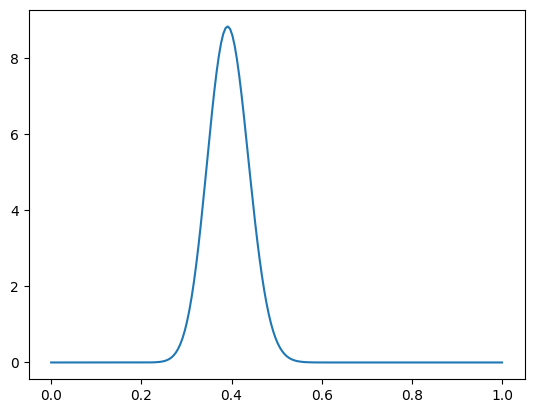

In [17]:
# Nota: usa prior uniforme, no beta 0.5. La beta 0.5 la mencionaron algunos attendees
pi_grid = np.linspace(0,1,num=200)

beta_rv = st.beta(46,71) #-> prior es uniforme que es beta con alpha = 1 y beta = 1
pdf = beta_rv.pdf(pi_grid)

plt.plot(pi_grid, pdf)

Formula de media a posterior de Beta = $\frac{\alpha}{\alpha + \beta}$

o lo hacemos con Monte Carlo (si no fuera facil la formula de media a posterior podria valer mas la pena)

In [14]:
posterior_rvs = beta_rv.rvs(10_000) #montecarlo

In [12]:
46/(46+71)

0.39316239316239315

In [16]:
np.quantile(posterior_rvs, (0.05, 0.95))

array([0.31946937, 0.46704497])

Distribución predictiva a posteriori - distribución beta-binomial

BetaBin(n, alpha, beta)

$\alpha$ a priori = BetaBin(n, 46, 71)

¿P(y>200 | n = 500)? no, ya vi 45 hits y 115 bats

P(y > 155 | 385)

In [21]:
bb_rv = st.betabinom(n=385, a=46, b=71)
pp_rvs = bb_rv.rvs(10_000)
pp_rvs

array([150, 106, 129, ..., 163, 174, 154])

<BarContainer object of 138 artists>

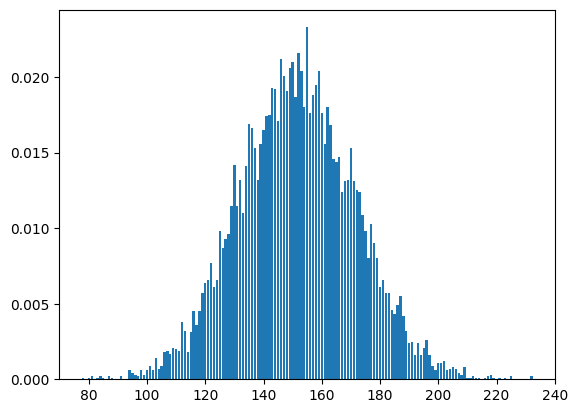

In [39]:
values, counts = np.unique(pp_rvs, return_counts = True)
plt.bar(values, counts/counts.sum()) # cada x es la probabilidad de que saque esa cantidad de hits en la cantidad de abs

In [38]:
(pp_rvs >= 155).sum()/10_000 # Probabilidad de que obtenga 200 hits en primeros 500 AB

0.438

Tener en cuenta que tiene error de no ser independientes los ensayos (al modelar estadística siempre simplificamos la realidad pero debemos ) y de aproximación de montecarlo.